Acting as data scientists for a company that rents bicycles. The idea is to understand which factors affect the demand for bicycles so that the company can create specific action plans to serve its customers.

Furthermore, the company also wants us to create a model that can predict how many bikes will be rented the next day or the next month. That is, we will be able to predict the future.

These predictions will be made using a very interesting library called Prophet, created by the Meta group, the same group behind Instagram and Facebook.


##Preparing and processing data*


In [1]:
import pandas as pd

In [2]:
#importing data
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


#checking null numbers

In [4]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [5]:
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [6]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,0
sensacao_termica,0
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [7]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


In [8]:
#Is there duplicate data?
df.duplicated().sum()

15

In [9]:
duplicate = df.duplicated(keep=False)
lines_duplicate= df[duplicate]
lines_duplicate.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [10]:
df_clean = df.drop_duplicates()

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [12]:
df_clean.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


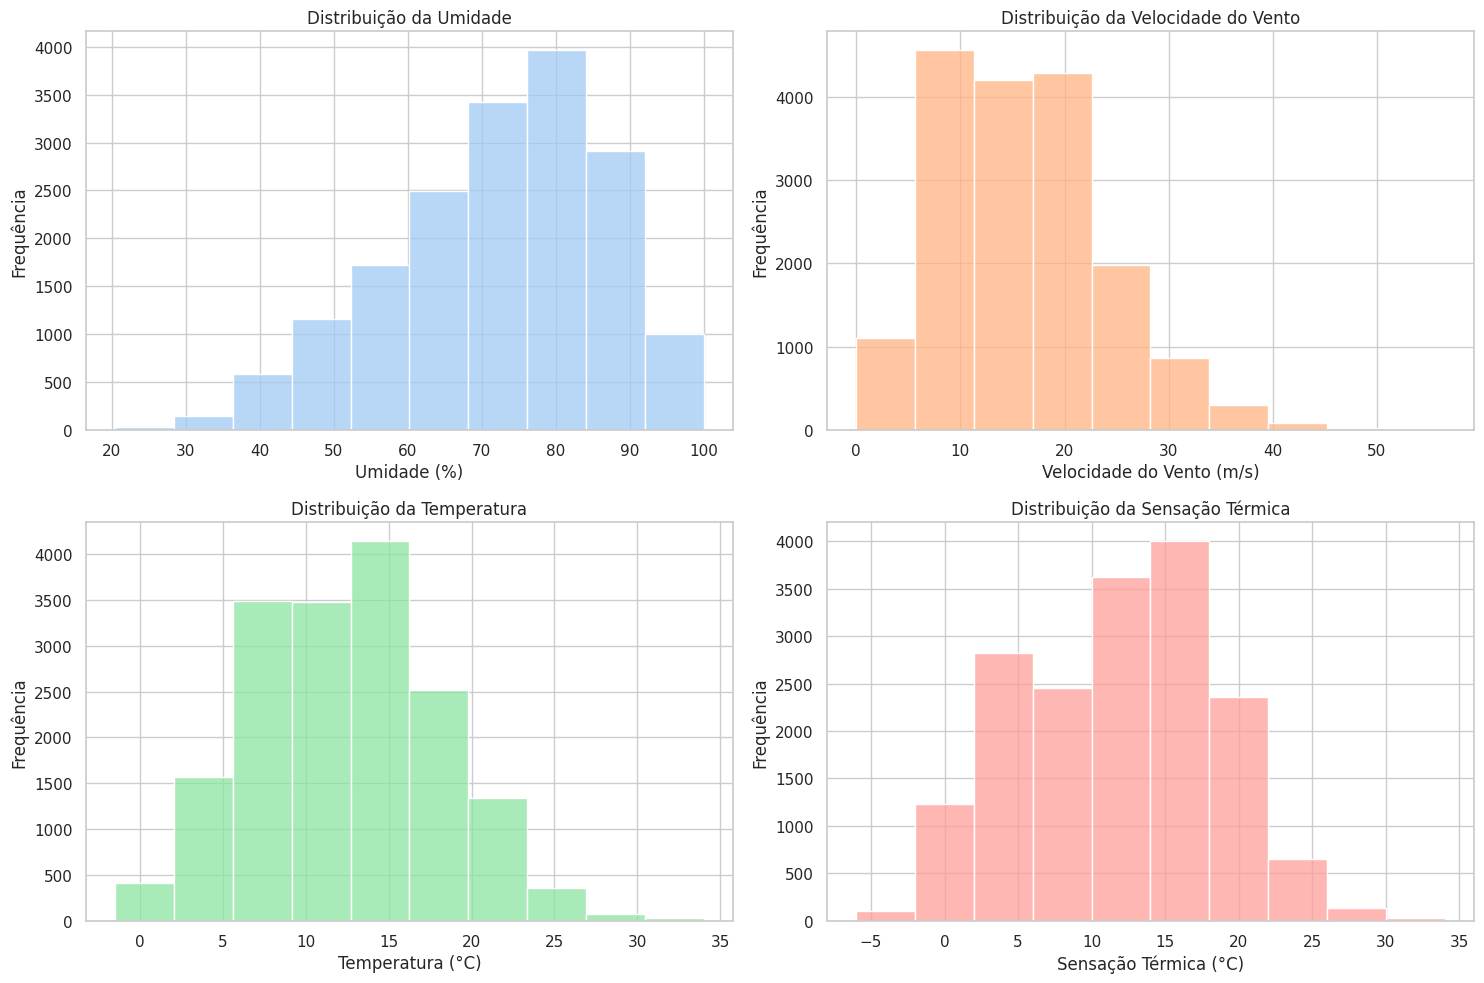

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajusting the palette style
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# setting the size of the figure
plt.figure(figsize=(15, 10))

# Subplot for each plot
plt.subplot(2, 2, 1)
sns.histplot(df_clean['umidade'], bins=10, color=palette[0])
plt.title('Distribuição da Umidade')
plt.xlabel('Umidade (%)')
plt.ylabel('Frequência')

plt.subplot(2, 2, 2)
sns.histplot(df_clean, x='velocidade_vento', bins=10, color=palette[1])
plt.title('Distribuição da Velocidade do Vento')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Frequência')

plt.subplot(2, 2, 3)
sns.histplot(df_clean, x='temperatura', bins=10, color=palette[2])
plt.title('Distribuição da Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')

plt.subplot(2, 2, 4)
sns.histplot(df_clean['sensacao_termica'], bins=10, color=palette[3])
plt.title('Distribuição da Sensação Térmica')
plt.xlabel('Sensação Térmica (°C)')
plt.ylabel('Frequência')

plt.tight_layout()

plt.show()


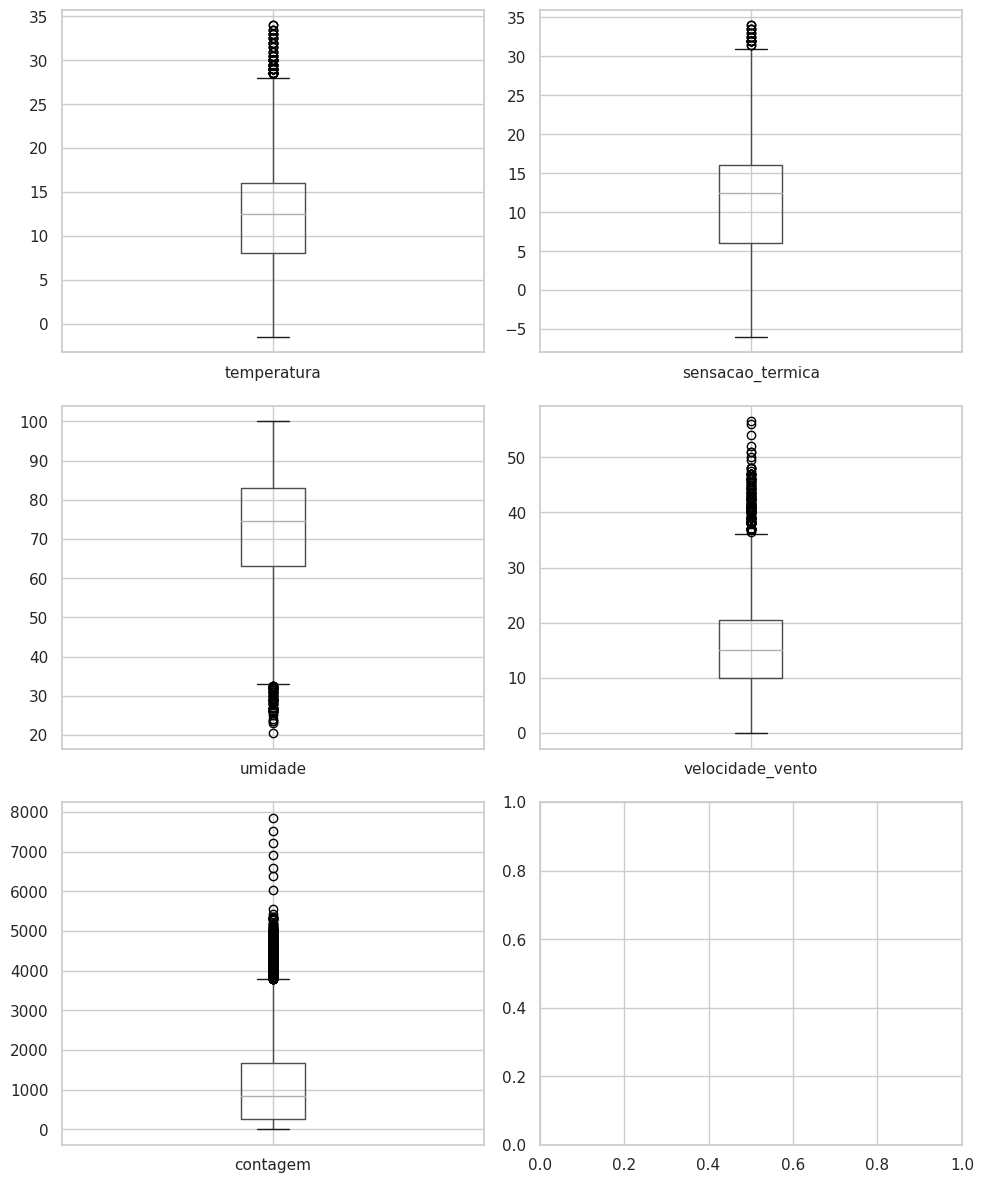

In [14]:
#creat plot boxplot of the columns using subplot

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

df_clean.boxplot(['temperatura'], ax=axes[0,0])
df_clean.boxplot(['sensacao_termica'], ax=axes[0,1])
df_clean.boxplot(['umidade'], ax=axes[1,0])
df_clean.boxplot(['velocidade_vento'], ax=axes[1,1])
df_clean.boxplot(['contagem'], ax=axes[2,0])

plt.tight_layout()

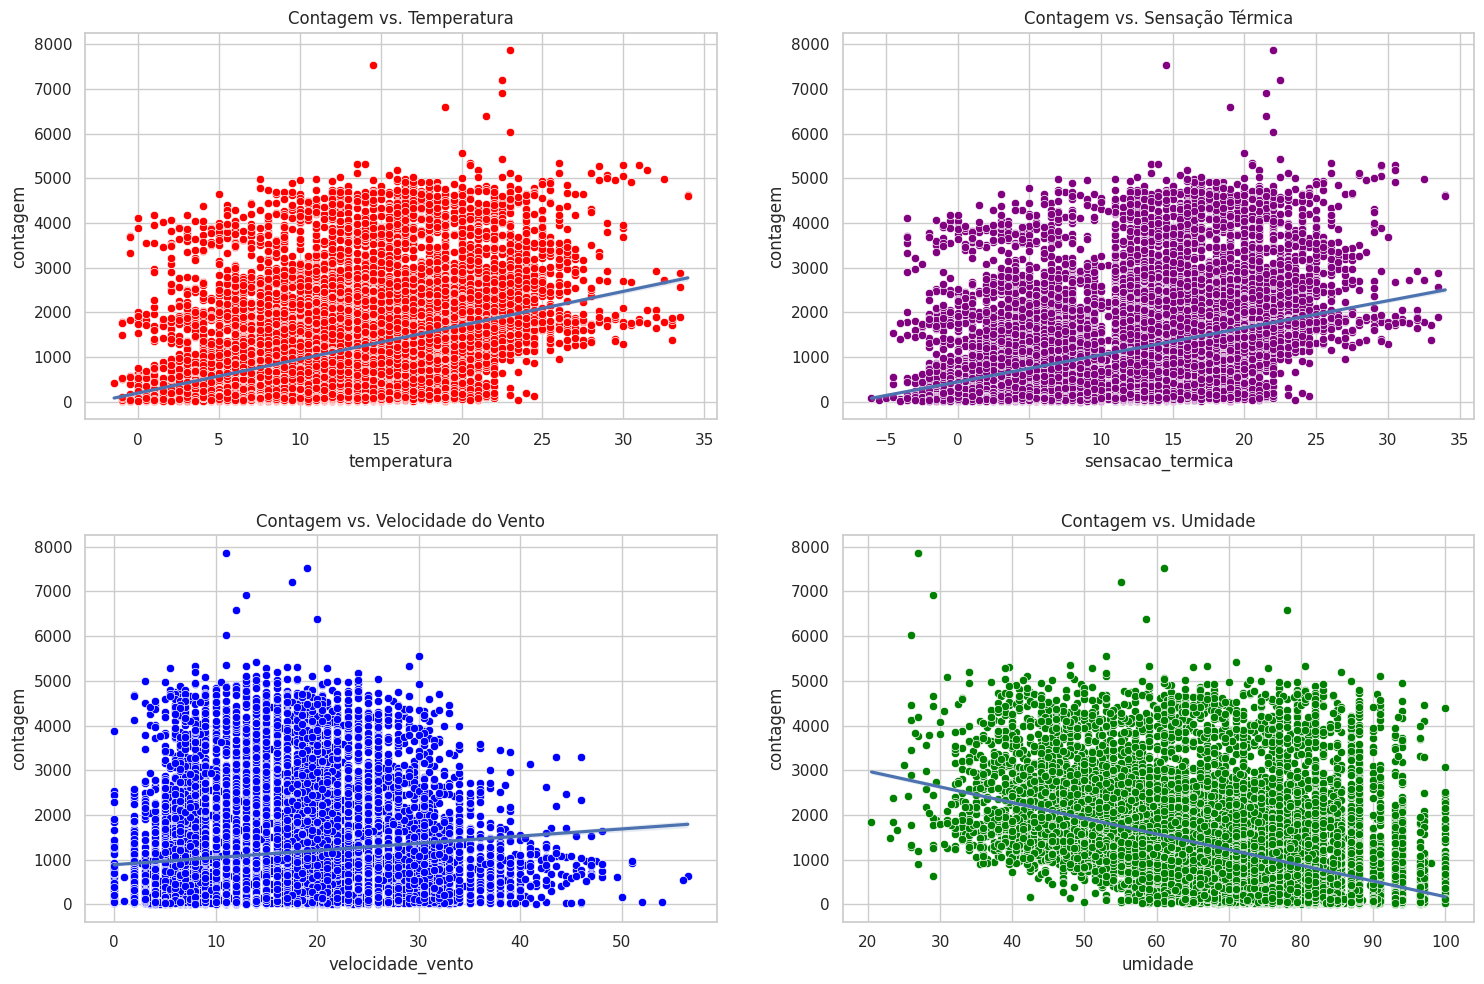

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the size of the figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Scatter plot contagem vs. temperatura
sns.scatterplot(x='temperatura', y='contagem', data=df_clean, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Contagem vs. Temperatura')
axes[0, 0].set_xlabel('Temperatura (°C)')
axes[0, 0].set_ylabel('Contagem')
sns.regplot(x='temperatura', y='contagem', data=df_clean, scatter=False, ax=axes[0, 0])

# Scatter plot contagem vs. umidade
sns.scatterplot(x='umidade', y='contagem', data=df_clean, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Contagem vs. Umidade')
axes[1, 1].set_xlabel('Umidade (%)')
axes[1, 1].set_ylabel('Contagem')
sns.regplot(x='umidade', y='contagem', data=df_clean, scatter=False, ax=axes[1, 1])

# Scatter plot contagem vs. velocidade do vento
sns.scatterplot(x='velocidade_vento', y='contagem', data=df_clean, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Contagem vs. Velocidade do Vento')
axes[1, 0].set_xlabel('Velocidade do Vento (m/s)')
axes[1, 0].set_ylabel('Contagem')
sns.regplot(x='velocidade_vento', y='contagem', data=df_clean, scatter=False, ax=axes[1, 0])

# Scatter plot contagem vs. sensação térmica
sns.scatterplot(x='sensacao_termica', y='contagem', data=df_clean, ax=axes[0, 1], color='purple')
axes[0, 1].set_title('Contagem vs. Sensação Térmica')
axes[0, 1].set_xlabel('Sensação Térmica (°C)')
axes[0, 1].set_ylabel('Contagem')
sns.regplot(x='sensacao_termica', y='contagem', data=df_clean, scatter=False, ax=axes[0, 1])

# Adjusting the layout to avoid overlapping
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# Show Plot
plt.show()

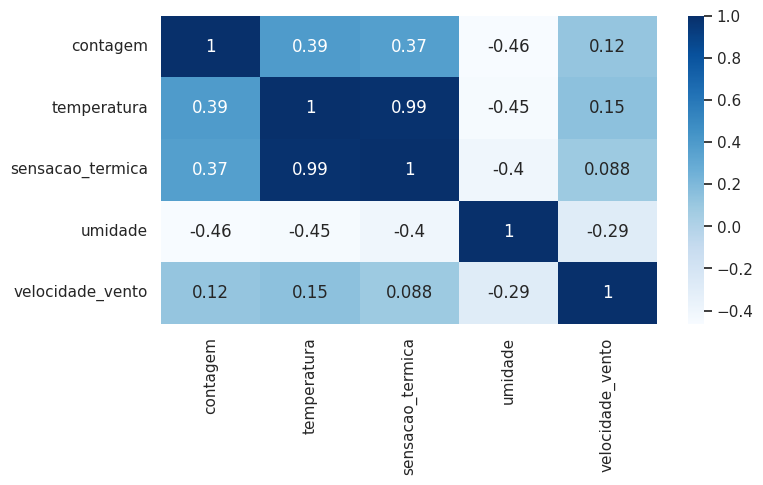

In [16]:
plt.figure(figsize=(8,4))

#correlation
sns.heatmap(df_clean.corr(numeric_only=True), cmap='Blues', annot=True)
plt.show()

In [17]:
#category analysis
df_clean.describe(include='object')

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [18]:
#uniques
for col in['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'{col}:')
  print(df_clean[col].unique())
  print('='*15, '\n')

clima:
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

feriado:
['Não' 'Sim']

fim_de_semana:
['Sim' 'Não']

estacao:
['Inverno' 'Primavera' 'Verão' 'Outono']



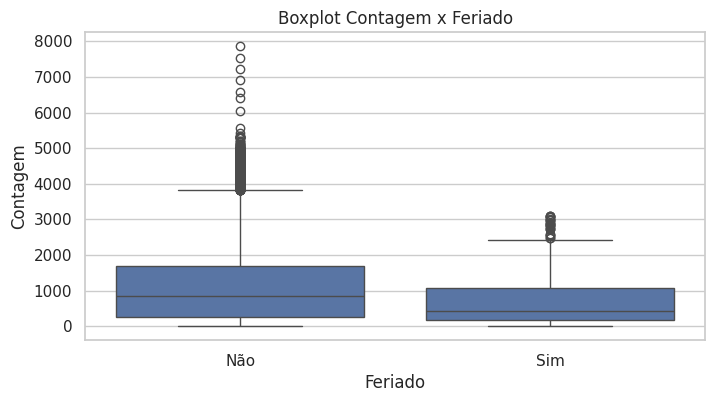

In [19]:
plt.figure(figsize=(8,4))

#Boxplot Contagem(count) x Feriado(holiday)
sns.boxplot(x='feriado', y='contagem', data=df_clean)
plt.title('Boxplot Contagem x Feriado')
plt.xlabel('Feriado')
plt.ylabel('Contagem')
plt.show()


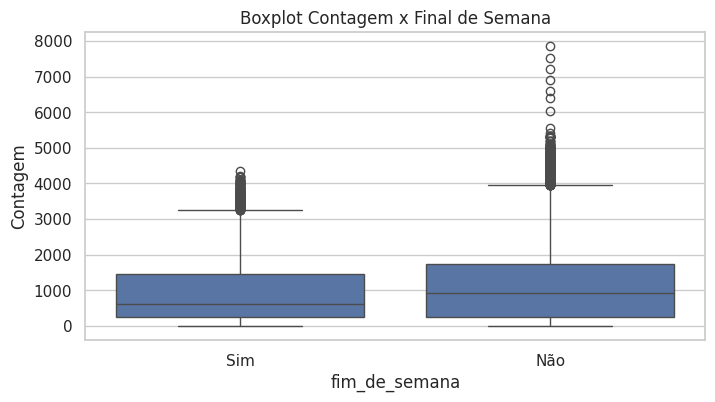

In [20]:
plt.figure(figsize=(8,4))

#Boxplot Contagem(count) x Final de Semana(Weekend)
sns.boxplot(x='fim_de_semana', y='contagem', data=df_clean)
plt.title('Boxplot Contagem x Final de Semana')
plt.xlabel('fim_de_semana')
plt.ylabel('Contagem')
plt.show()

In [21]:
# Median Weekend and Holiday
median_weekend = df_clean.groupby('fim_de_semana')['contagem'].median()
median_holiday = df_clean.groupby('feriado')['contagem'].median()

In [22]:
print(median_weekend)
print('='*15, '\n')
print(median_holiday)

fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64


In [23]:
#Count tips of Weather
df_clima = df_clean.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


<ipython-input-24-c88bc1b8f759>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contagem', y='clima', data=df_clima, palette='Blues_r', orient='h')


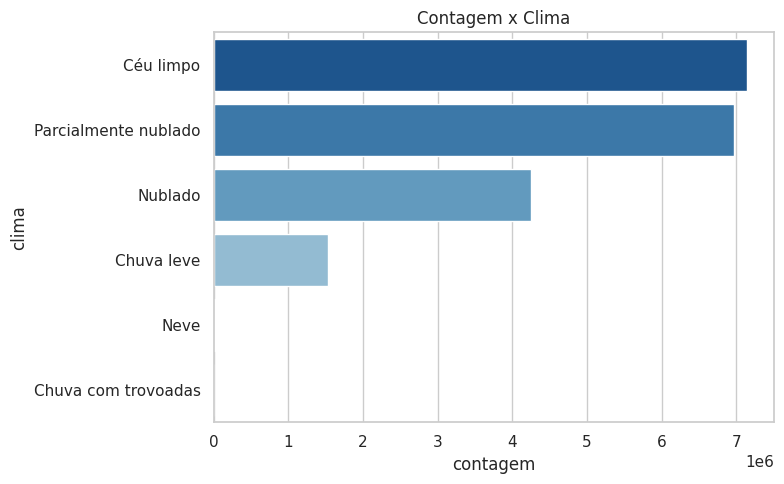

In [24]:
# plot Weather
plt.figure(figsize=(8,5))
sns.barplot(x='contagem', y='clima', data=df_clima, palette='Blues_r', orient='h')
plt.title('Contagem x Clima')

plt.tight_layout()
plt.show()

In [25]:
#df Season
df_season = df_clean.groupby('estacao')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)
df_season

,estacao,contagem
3,Verão,6424609
1,Outono,5073040
2,Primavera,4850236
0,Inverno,3558087


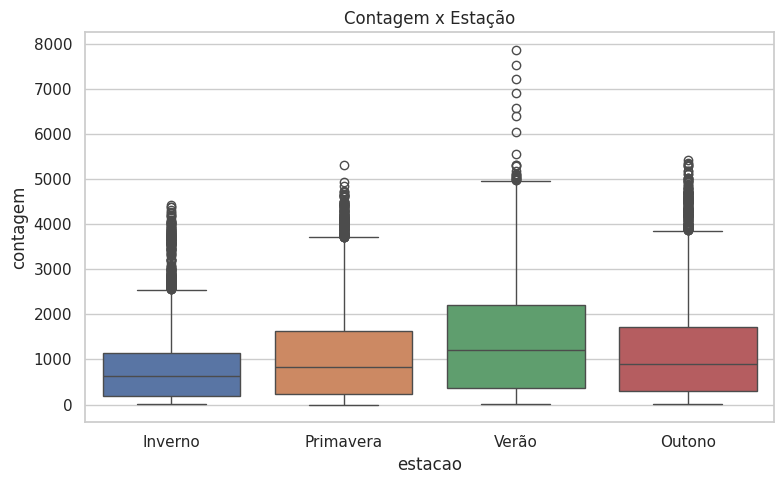

In [26]:
#plot Season Sns
plt.figure(figsize=(8,5))
sns.boxplot(x='estacao', y='contagem', data=df_clean, hue='estacao')
plt.title('Contagem x Estação')

plt.tight_layout()
plt.show()

In [27]:
df_clean.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [28]:
#Is spring the same as autumn?
from scipy.stats import mannwhitneyu

# Separating spring and autumn data
primavera = df_clean[df_clean['estacao'] == 'Primavera']['contagem']
outono = df_clean[df_clean['estacao'] == 'Outono']['contagem']

# Test the Mann-Whitney
statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')

# Printing the results
print(f'Estatística do teste: {statistic:.2f}')
print(f'Valor-p: {p_value:.5f}')

# Interpreting the result
alpha = 0.05
if p_value < alpha:
  print('We reject the null hypothesis. There is evidence that spring bicycle counts are different from autumn.')
else:
  print('We do not reject the null hypothesis. There is no evidence that spring bicycle counts are different from autumn.')

Estatística do teste: 9044682.50
Valor-p: 0.00048
We reject the null hypothesis. There is evidence that spring bicycle counts are different from autumn.


In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [30]:
#transform data_hora dtype object to datetime
df_data = df_clean.copy()

In [31]:
df_data['data_hora'] = pd.to_datetime(df_clean['data_hora'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [32]:
#Creating columns Month and Hour
df_data['month'] = df_data['data_hora'].dt.month
df_data['hour'] = df_data['data_hora'].dt.hour
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,month,hour
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [33]:
df_data['data_hora'] =  df_data['data_hora'].dt.date
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,month,hour
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [34]:
df_data = df_data.rename(columns={'data_hora': 'date'})
df_data.head()

,date,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,month,hour
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [35]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  month             17414 non-null  int32  
 11  hour              17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [36]:
df_data['date'] = pd.to_datetime(df_data['date'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  month             17414 non-null  int32         
 11  hour              17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 2.1+ MB


In [37]:
df_hour = df_data.groupby('hour')['contagem'].sum().reset_index()
df_hour

,hour,contagem
0,0,210401
1,1,145257
2,2,98275
3,3,67951
4,4,52859
5,5,79820
6,6,338771
7,7,1066309
8,8,2087164
9,9,1201745


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

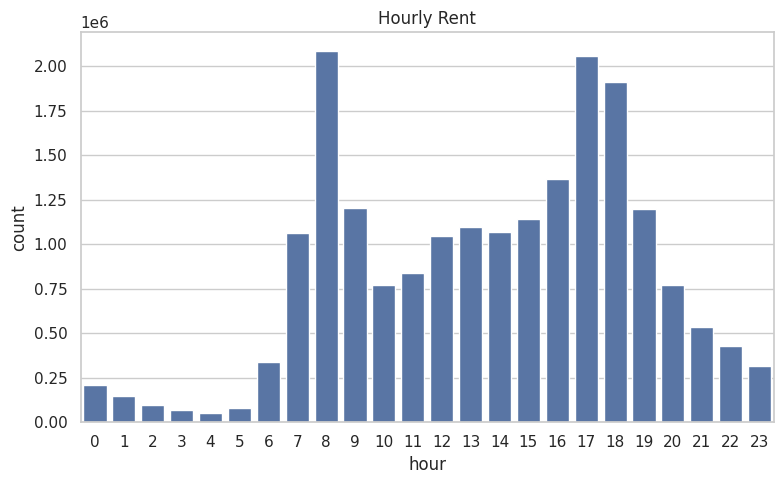

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='hour', y='contagem', data=df_hour)
plt.title('Hourly Rent')
plt.xlabel('hour')
plt.ylabel('count')

plt.tight_layout()
plt

In [39]:
df_weekends = df_data[df_data['fim_de_semana'] == 'Sim']
df_weekends

,date,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,month,hour
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
17361,2017-01-01,136,5.00,2.00,93.0,15.0,Chuva leve,Não,Sim,Inverno,1,19
17362,2017-01-01,116,5.00,2.00,93.0,14.0,Chuva leve,Não,Sim,Inverno,1,20
17363,2017-01-01,110,5.00,2.00,93.0,14.0,Neve,Não,Sim,Inverno,1,21
17364,2017-01-01,119,5.00,2.00,93.0,12.0,Nublado,Não,Sim,Inverno,1,22


In [40]:
rent_weekends = df_weekends.groupby('hour')['contagem'].sum().reset_index()
rent_weekends

,hour,contagem
0,0,98841
1,1,78952
2,2,56394
3,3,40474
4,4,25899
5,5,19937
6,6,24955
7,7,44129
8,8,85652
9,9,162990


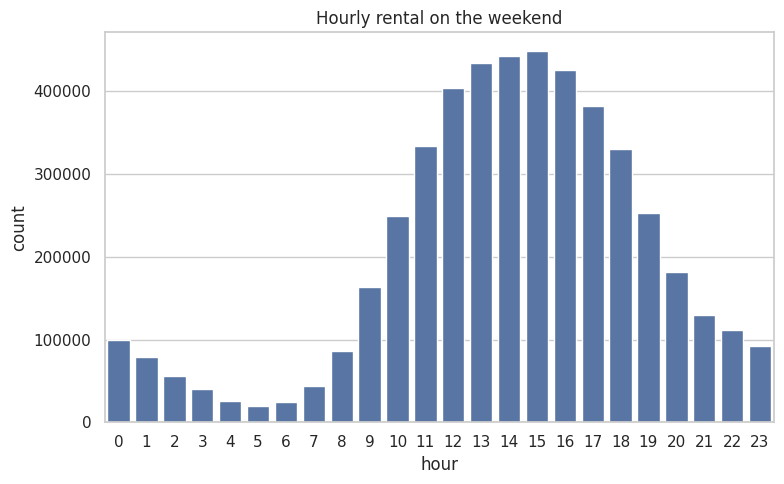

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x='hour', y='contagem', data=rent_weekends)
plt.title('Hourly rental on the weekend')
plt.xlabel('hour')
plt.ylabel('count')

plt.tight_layout()
plt.show()

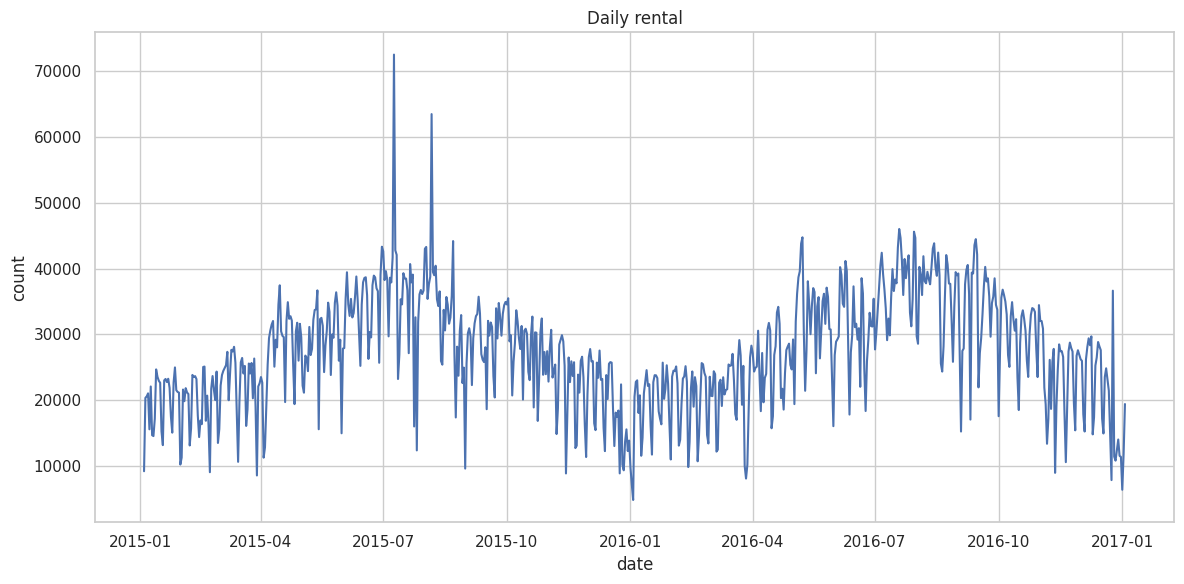

In [42]:
df_time = df_data.groupby('date')['contagem'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='contagem', data=df_time)
plt.title('Daily rental')
plt.xlabel('date')
plt.ylabel('count')

plt.tight_layout()

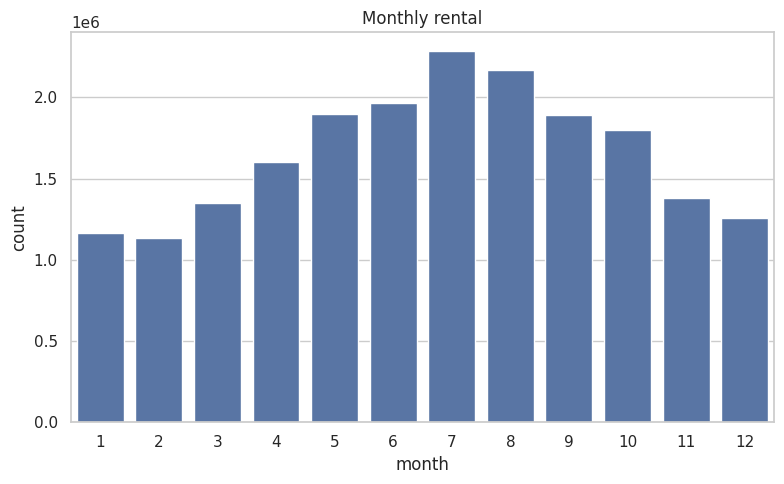

In [43]:
df_month = df_data.groupby('month')['contagem'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='month', y='contagem', data=df_month)
plt.title('Monthly rental')
plt.xlabel('month')
plt.ylabel('count')

plt.tight_layout()

In [44]:
#Mean per Month
df_time['Month'] = df_time['date'].dt.to_period('M')
df_time

,date,contagem,Month
0,2015-01-04,9234,2015-01
1,2015-01-05,20372,2015-01
2,2015-01-06,20613,2015-01
3,2015-01-07,21064,2015-01
4,2015-01-08,15601,2015-01
...,...,...,...
725,2016-12-30,11566,2016-12
726,2016-12-31,11424,2016-12
727,2017-01-01,6421,2017-01
728,2017-01-02,11823,2017-01


In [45]:
df_avg_month = df_time.groupby('Month')['contagem'].mean().reset_index()
df_avg_month

,Month,contagem
0,2015-01,19522.821429
1,2015-02,19414.071429
2,2015-03,22449.483871
3,2015-04,27719.400000
4,2015-05,28884.290323
5,2015-06,34441.733333
6,2015-07,36151.193548
7,2015-08,33353.258065
8,2015-09,29749.266667
9,2015-10,27904.709677


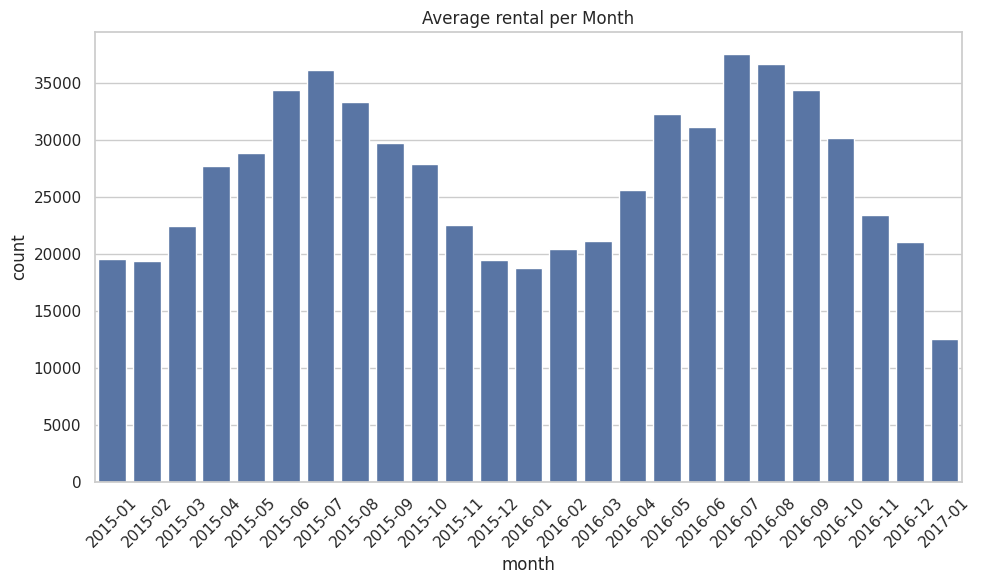

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='contagem', data=df_avg_month)
plt.title('Average rental per Month')
plt.xlabel('month')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [47]:
# importing prophet
from prophet import Prophet

In [48]:
# create dataframe with 2 columns x and y
df_prophet = df_data[['date', 'contagem']]
df_prophet.head()

,date,contagem
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [49]:
#rename df_prophet
df_prophet = df_prophet.rename(columns={'date': 'ds', 'contagem': 'y'})
df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [50]:
#if ds is equal, group and add y
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [51]:
import numpy as np

np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)

future = modelo.make_future_dataframe(periods=90, freq='D')
forecast = modelo.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/od9l8izk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/_cbq4gqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93974', 'data', 'file=/tmp/tmp_7uky2q3/od9l8izk.json', 'init=/tmp/tmp_7uky2q3/_cbq4gqf.json', 'output', 'file=/tmp/tmp_7uky2q3/prophet_model3u3eu0ux/prophet_model-20240819182456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:24:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


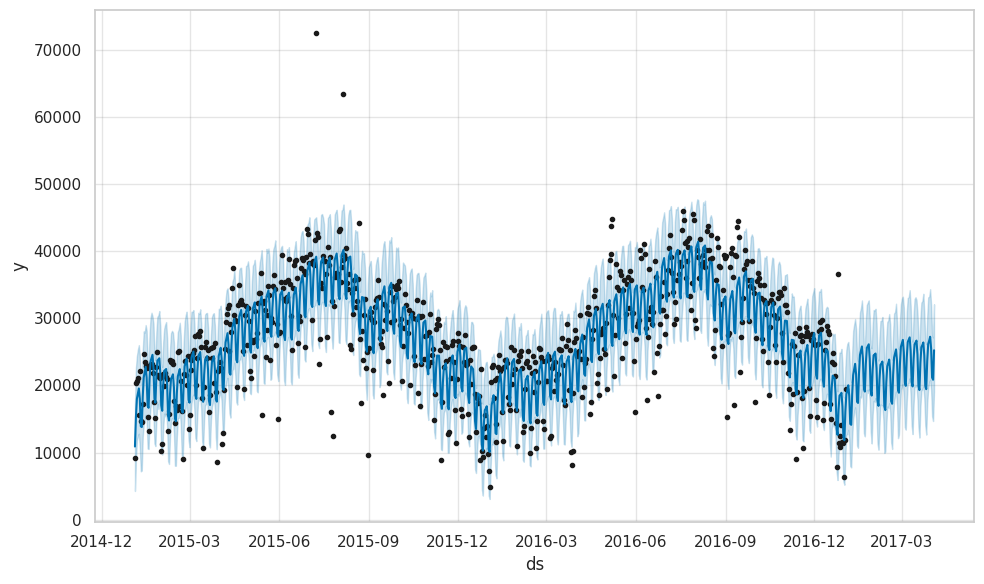

In [52]:
fig1 = modelo.plot(forecast)

In [53]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

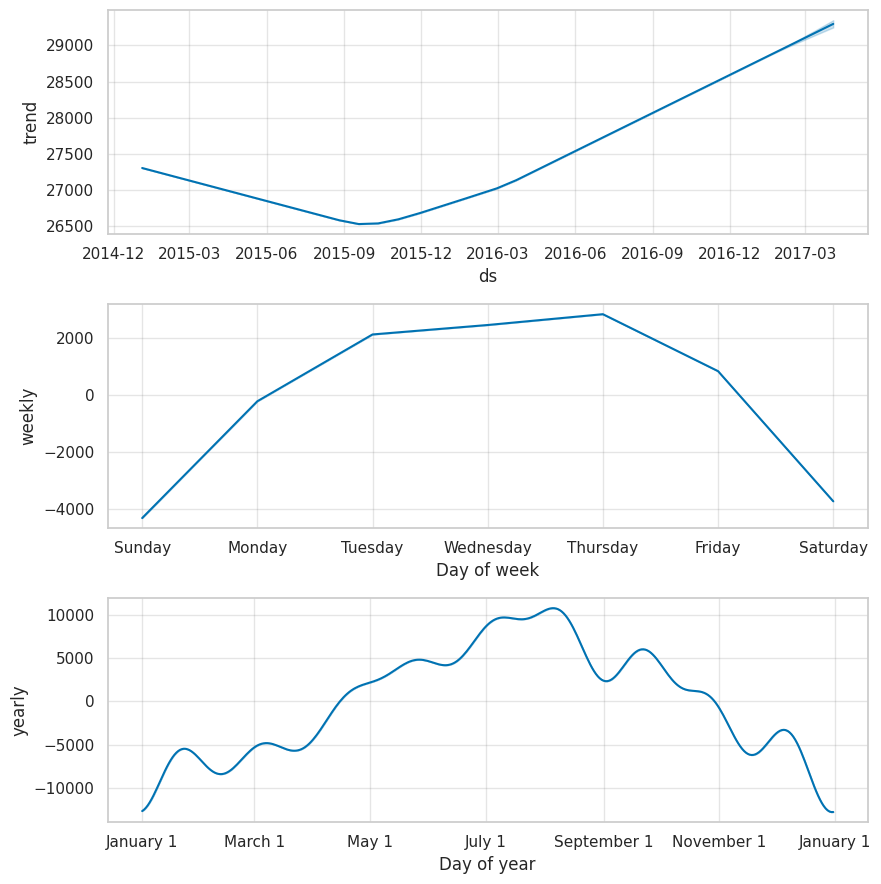

In [54]:
fig2 = modelo.plot_components(forecast)

In [55]:
df_prophet.shape

(730, 2)

In [56]:
# Separating 80% of data for training
# df train
df_train = pd.DataFrame()

df_train['ds'] = df_prophet['ds'][:584]
df_train['y'] = df_prophet['y'][:584]

In [57]:
# Separating 20% of data for testing
df_test = pd.DataFrame()

df_test['ds'] = df_prophet['ds'][584:]
df_test['y'] = df_prophet['y'][584:]

In [58]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_train)

future = modelo.make_future_dataframe(periods=150, freq='D')
forecast = modelo.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/nua67ljo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/3kqvmk2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16716', 'data', 'file=/tmp/tmp_7uky2q3/nua67ljo.json', 'init=/tmp/tmp_7uky2q3/3kqvmk2j.json', 'output', 'file=/tmp/tmp_7uky2q3/prophet_model97a9m55b/prophet_model-20240819182459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:24:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


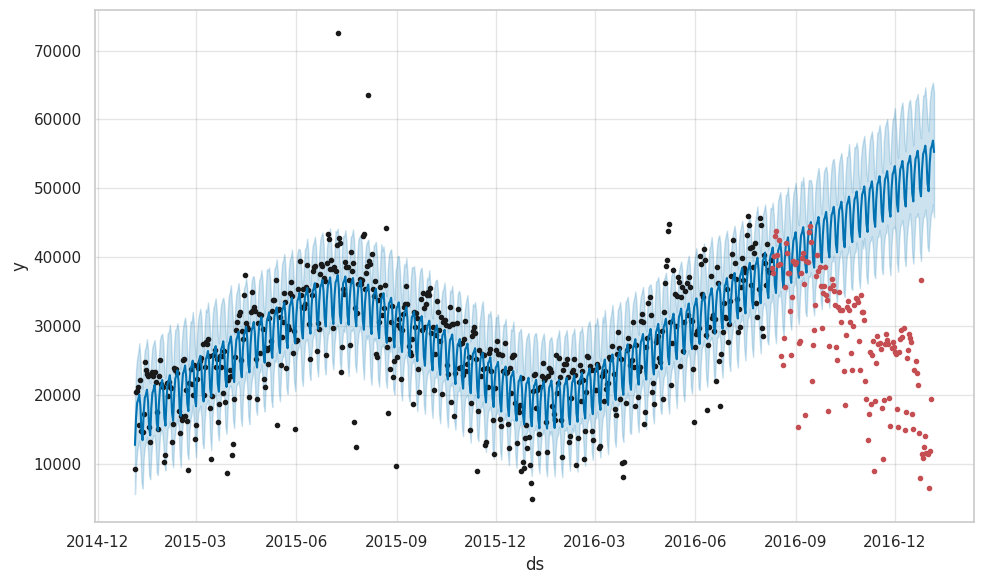

In [59]:
fig1 = modelo.plot(forecast)
plt.plot(df_test['ds'], df_test['y'], '.r')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


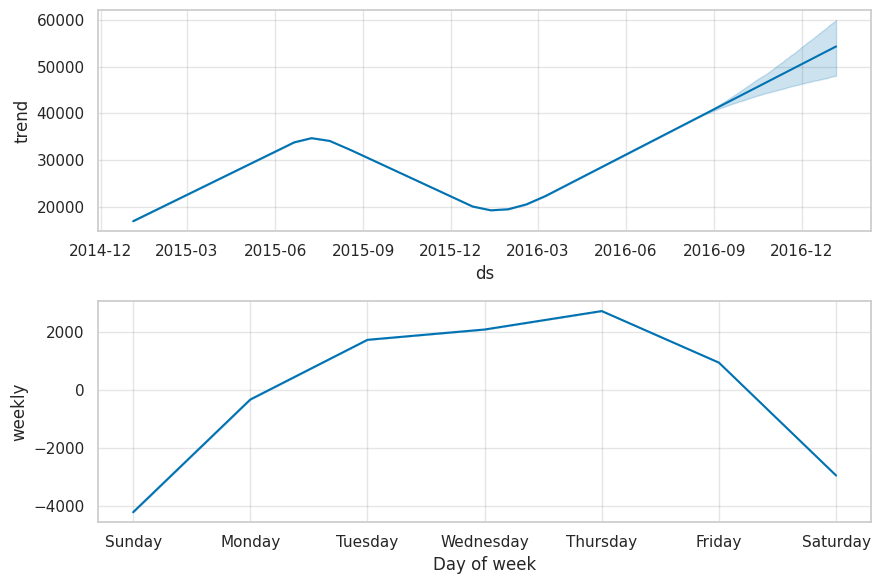

In [60]:
fig2 = modelo.plot_components(forecast)

In [61]:
df_forecast = forecast[['ds', 'yhat']]
df_comparison = pd.merge(df_forecast, df_test, on='ds')
df_comparison

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


In [62]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparison['y'], df_comparison['yhat'])
rmse = np.sqrt(mse)
print(f'MSE:{mse}, RMSE: {rmse}')

MSE:466132050.6184666, RMSE: 21590.09149166503


In [63]:
# improving model / yearly_seasonality=True
np.random.seed(4587)

modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_train)

future = modelo.make_future_dataframe(periods=150, freq='D')
forecast = modelo.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/1vfxvi6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/ihnn0e7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58291', 'data', 'file=/tmp/tmp_7uky2q3/1vfxvi6c.json', 'init=/tmp/tmp_7uky2q3/ihnn0e7m.json', 'output', 'file=/tmp/tmp_7uky2q3/prophet_model_0lm9wi2/prophet_model-20240819182502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:25:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


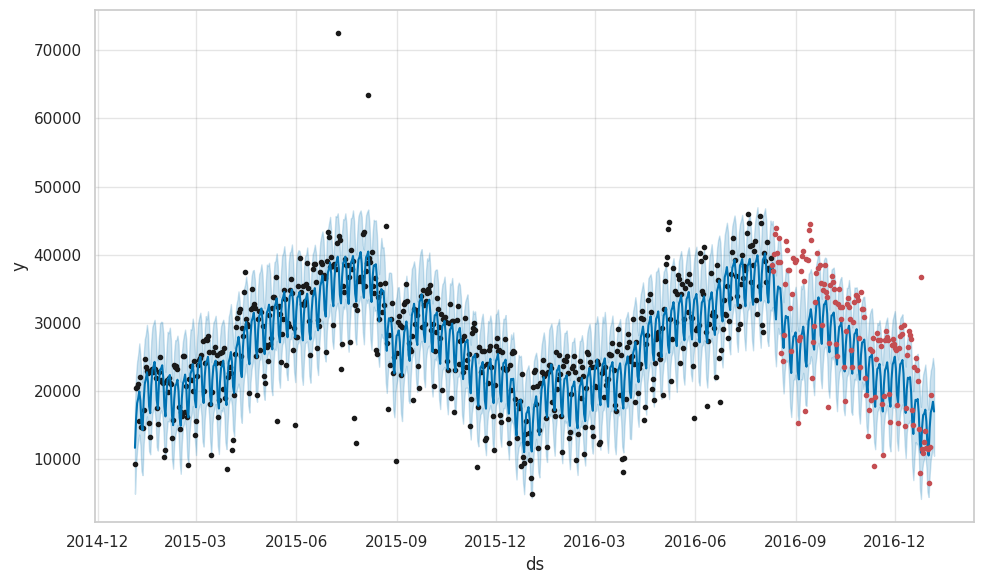

In [64]:
fig1 = modelo.plot(forecast)
plt.plot(df_test['ds'], df_test['y'], '.r')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

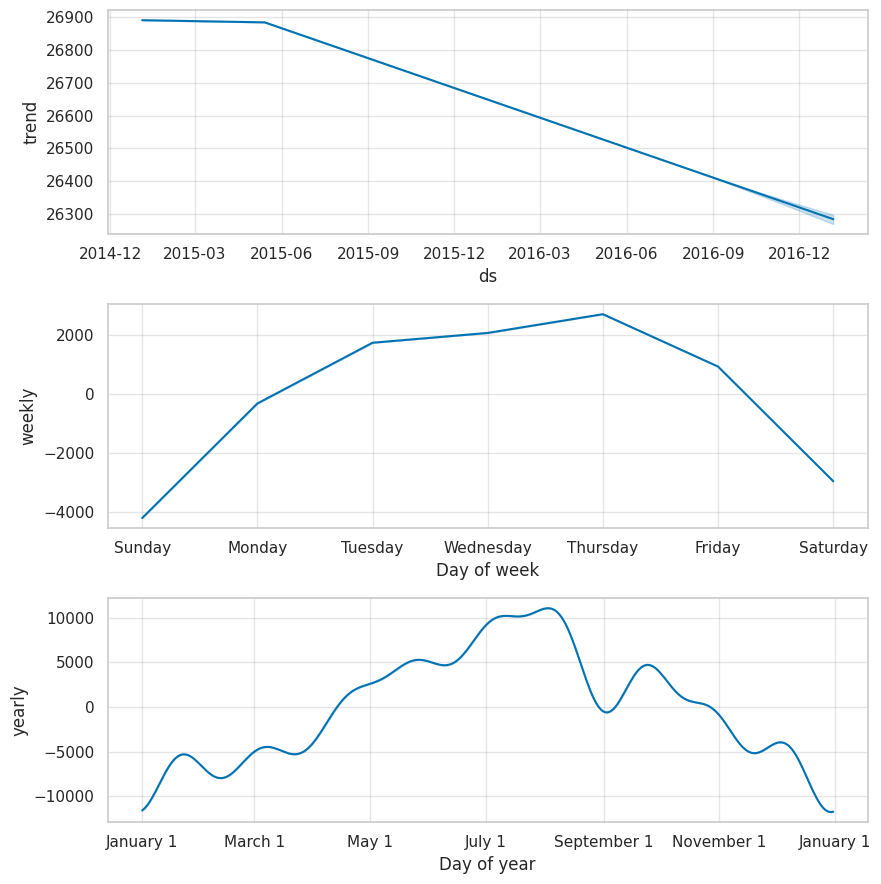

In [65]:
fig2 = modelo.plot_components(forecast)

In [66]:
df_forecast = forecast[['ds', 'yhat']]
df_comparison = pd.merge(df_forecast, df_test, on='ds')
df_comparison

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [67]:
mse = mean_squared_error(df_comparison['y'], df_comparison['yhat'])
rmse = np.sqrt(mse)
print(f'MSE:{mse}, RMSE: {rmse}')

MSE:38623883.499975376, RMSE: 6214.8116222437


The model improved, the RMSE dropped from 21590.09 to 6214.81

In [68]:
# further improving the model
#removing outliers
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [69]:
# model for confidence interval
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)

future = modelo.make_future_dataframe(periods=0)
forecast = modelo.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/n17bm4q7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/tqozb0ak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69074', 'data', 'file=/tmp/tmp_7uky2q3/n17bm4q7.json', 'init=/tmp/tmp_7uky2q3/tqozb0ak.json', 'output', 'file=/tmp/tmp_7uky2q3/prophet_model2bel8326/prophet_model-20240819182505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:25:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:25:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [70]:
#without outliers
without_outliers = df_prophet[(df_prophet['y'] > forecast['yhat_lower']) & (df_prophet['y']<forecast['yhat_upper'])]
without_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [71]:
df_train = pd.DataFrame()

df_train['ds'] = without_outliers['ds'][:505]
df_train['y'] = without_outliers['y'][:505]

In [72]:
df_test= pd.DataFrame()

df_test['ds'] = without_outliers['ds'][505:]
df_test['y'] = without_outliers['y'][505:]

In [73]:
#model without outliers
np.random.seed(4587)

modelo_without_outliers = Prophet(yearly_seasonality=True)
modelo_without_outliers.fit(df_train)

future = modelo_without_outliers.make_future_dataframe(periods=150, freq='D')
forecast = modelo_without_outliers.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/u971k2_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/l8dzxq17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59397', 'data', 'file=/tmp/tmp_7uky2q3/u971k2_3.json', 'init=/tmp/tmp_7uky2q3/l8dzxq17.json', 'output', 'file=/tmp/tmp_7uky2q3/prophet_model24___4xu/prophet_model-20240819182506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:25:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:25:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


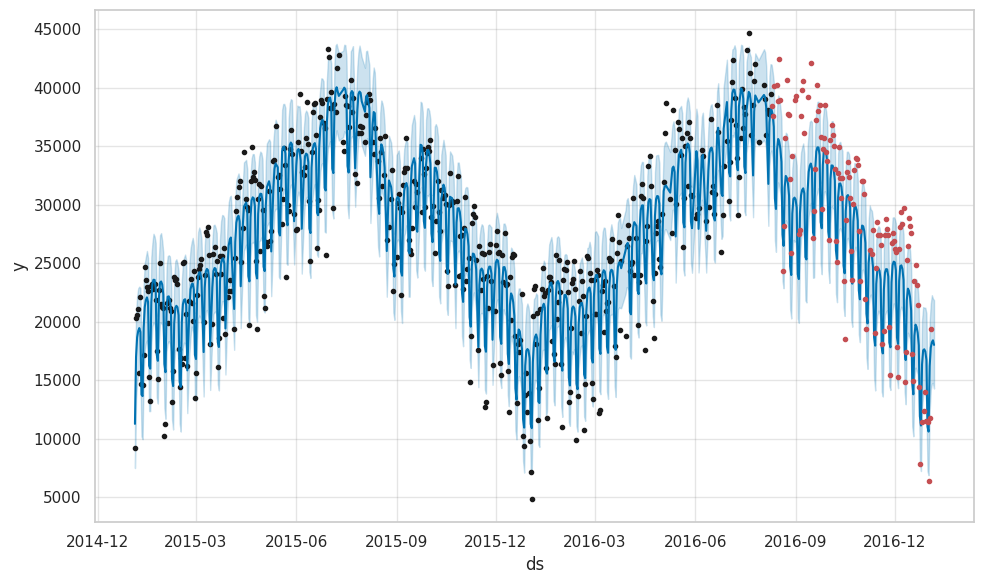

In [74]:
fig1 = modelo_without_outliers.plot(forecast)
plt.plot(df_test['ds'], df_test['y'], '.r')

In [75]:
df_forecast = forecast[['ds', 'yhat']]
df_comparison = pd.merge(df_forecast, df_test, on='ds')
df_comparison

,ds,yhat,y
0,2016-08-10,38124.205916,38430
1,2016-08-11,37708.703632,37626
2,2016-08-12,36664.046726,40159
3,2016-08-15,34692.056037,40236
4,2016-08-16,35633.113613,38911
...,...,...,...
121,2016-12-30,16752.064183,11566
122,2016-12-31,11045.380016,11424
123,2017-01-01,10626.497538,6421
124,2017-01-02,16230.512446,11823


In [76]:
mse = mean_squared_error(df_comparison['y'], df_comparison['yhat'])
rmse = np.sqrt(mse)
print(f'MSE:{mse}, RMSE: {rmse}')

MSE:15672925.764235971, RMSE: 3958.904616713564


The model improved, the RMSE dropped from 6214.81 to 3958.90


In [77]:
#using model to predict 1 years
np.random.seed(4587)

modelo_without_outliers = Prophet(yearly_seasonality=True)
modelo_without_outliers.fit(df_train)

future = modelo_without_outliers.make_future_dataframe(periods=365, freq='D')
forecast = modelo_without_outliers.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/muymq5iq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_7uky2q3/tg7ls1gm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45502', 'data', 'file=/tmp/tmp_7uky2q3/muymq5iq.json', 'init=/tmp/tmp_7uky2q3/tg7ls1gm.json', 'output', 'file=/tmp/tmp_7uky2q3/prophet_modelf5auxc8a/prophet_model-20240819182508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:25:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:25:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [78]:
from prophet.plot import plot_plotly

In [79]:
fig = plot_plotly(modelo_without_outliers, forecast)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()
